In [1]:
import pandas as pd
import numpy as np

In [2]:
benign=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.benign.csv")
g_c=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.gafgyt.combo.csv")
g_j=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.gafgyt.junk.csv")
g_s=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.gafgyt.scan.csv")
g_t=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.gafgyt.tcp.csv")
g_u=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.gafgyt.udp.csv")
m_a=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.mirai.ack.csv")
m_sc=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.mirai.scan.csv")
m_sy=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.mirai.syn.csv")
m_u=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.mirai.udp.csv")
m_u_p=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.mirai.udpplain.csv")

benign=benign.sample(frac=0.25,replace=False)
g_c=g_c.sample(frac=0.25,replace=False)
g_j=g_j.sample(frac=0.5,replace=False)
g_s=g_s.sample(frac=0.5,replace=False)
g_t=g_t.sample(frac=0.15,replace=False)
g_u=g_u.sample(frac=0.15,replace=False)
m_a=m_a.sample(frac=0.25,replace=False)
m_sc=m_sc.sample(frac=0.15,replace=False)
m_sy=m_sy.sample(frac=0.25,replace=False)
m_u=m_u.sample(frac=0.1,replace=False)
m_u_p=m_u_p.sample(frac=0.27,replace=False)

benign['type']='benign'
m_u['type']='mirai_udp'
g_c['type']='gafgyt_combo'
g_j['type']='gafgyt_junk'
g_s['type']='gafgyt_scan'
g_t['type']='gafgyt_tcp'
g_u['type']='gafgyt_udp'
m_a['type']='mirai_ack'
m_sc['type']='mirai_scan'
m_sy['type']='mirai_syn'
m_u_p['type']='mirai_udpplain'

data=pd.concat([benign,m_u,g_c,g_j,g_s,g_t,g_u,m_a,m_sc,m_sy,m_u_p],
               axis=0, sort=False, ignore_index=True)

In [3]:
data.groupby('type')['type'].count()

type
benign            15538
gafgyt_combo      15345
gafgyt_junk       15449
gafgyt_scan       14648
gafgyt_tcp        15676
gafgyt_udp        15602
mirai_ack         15138
mirai_scan        14517
mirai_syn         16436
mirai_udp         15625
mirai_udpplain    15304
Name: type, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169278 entries, 0 to 169277
Columns: 116 entries, MI_dir_L5_weight to type
dtypes: float64(115), object(1)
memory usage: 149.8+ MB


In [5]:
data.isna().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_magnitude     0
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
type                     0
Length: 116, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#Independent features
x= data.iloc[:,:-1]
y= data.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [8]:
x_train.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
28716,83.411302,408.030580,50798.855566,160.290691,384.327509,55023.351671,448.472337,371.420862,56848.260955,3020.694212,...,0.000000e+00,0.0,0.0,1.000000,554.0,0.000000,554.0,0.000000e+00,0.0,0.0
136007,70.567792,60.038627,0.841666,90.505391,60.080591,1.697045,238.734906,60.134660,2.531065,2039.920032,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0
159650,104.071577,422.890049,47578.474042,158.459817,379.124632,55806.527746,401.885924,331.565040,60397.363192,3285.804833,...,6.984919e-10,0.0,0.0,13121.974034,554.0,0.000047,554.0,2.211891e-09,0.0,0.0
36255,158.130239,74.006206,0.151575,269.727566,74.013976,0.362460,833.235700,74.025815,0.773583,7793.352602,...,0.000000e+00,0.0,0.0,1.000000,74.0,0.000000,74.0,0.000000e+00,0.0,0.0
147252,96.431327,64.878870,44.654165,141.308732,66.349602,48.853285,347.829135,67.438381,49.117076,3286.265587,...,0.000000e+00,0.0,0.0,1.000000,74.0,0.000000,74.0,0.000000e+00,0.0,0.0


In [9]:
y_train.head()

28716          mirai_udp
136007        mirai_scan
159650    mirai_udpplain
36255       gafgyt_combo
147252         mirai_syn
Name: type, dtype: object

In [14]:
#Preprunning
parameters= {
    'criterion' : ['gini', 'entrophy', 'log_loss'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'max_features' : ['auto', 'sqrt', 'log2']
    
}

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [16]:
treemodel= DecisionTreeClassifier()
cv= GridSearchCV(treemodel,param_grid= parameters, cv= 100, scoring= 'accuracy')

In [17]:
cv.fit(x_train,y_train)

C:\Users\Kush\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18000 fits failed out of a total of 27000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Kush\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kush\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Kush\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'entrophy'

-------------------------------

GridSearchCV(cv=100, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entrophy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [18]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [21]:
y_pred= cv.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [23]:
score= accuracy_score(y_pred, y_test)

In [24]:
score

0.9904891304347826

In [25]:
classification_report(y_pred, y_test)

'                precision    recall  f1-score   support\n\n        benign       1.00      1.00      1.00      3125\n  gafgyt_combo       0.96      1.00      0.98      2928\n   gafgyt_junk       1.00      0.97      0.98      3110\n   gafgyt_scan       1.00      1.00      1.00      2890\n    gafgyt_tcp       0.94      1.00      0.97      2888\n    gafgyt_udp       1.00      0.94      0.97      3423\n     mirai_ack       1.00      1.00      1.00      3083\n    mirai_scan       1.00      1.00      1.00      2870\n     mirai_syn       1.00      1.00      1.00      3314\n     mirai_udp       1.00      1.00      1.00      3131\nmirai_udpplain       1.00      1.00      1.00      3094\n\n      accuracy                           0.99     33856\n     macro avg       0.99      0.99      0.99     33856\n  weighted avg       0.99      0.99      0.99     33856\n'

In [26]:
confusion_matrix(y_pred, y_test)

array([[3125,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 2916,   12,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  108, 3002,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    1,    1, 2887,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    1,    0, 2885,    2,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  193, 3230,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 3081,    0,    0,    0,    2],
       [   0,    0,    0,    0,    0,    0,    0, 2870,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 3314,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 3131,    0],
       [   1,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3093]],
      dtype=int64)

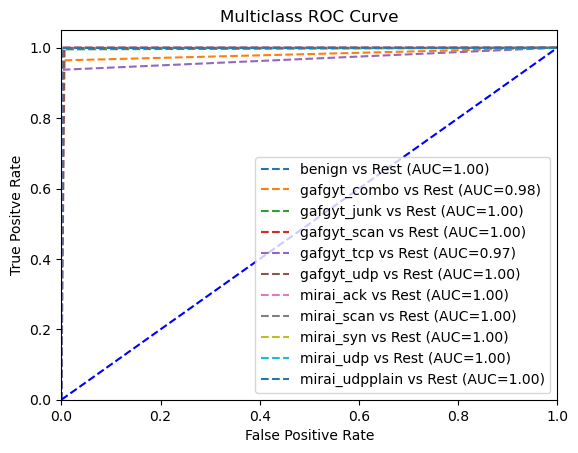

In [27]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt  

y_test_binarize= label_binarize(y_test, classes= np.unique(y_test))
y_pred_binarize= label_binarize(y_pred, classes= np.unique(y_pred))

#ROC Curve
fpr= {}
tpr= {}
thresh= {}
roc_auc= dict()
classes= np.unique(y_test)
n_class= classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarize[:,i], y_pred_binarize[:,i])
    roc_auc[i]= auc(fpr[i], tpr[i])
    
    #plotting
    plt.plot(fpr[i], tpr[i], linestyle= '--', label= '%s vs Rest (AUC=%0.2f)'% (classes[i], roc_auc[i]))
    
plt.plot([0,1], [0,1], 'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.legend(loc= 'lower right')
plt.show()